In [26]:
import os, argparse, pandas as pd
import json 

laser_scores_path = "/home/lnishimw/scratch/RoLASER/outputs/demo/outputs_laser2.json"
rolaser_scores_path = "/home/lnishimw/scratch/RoLASER/outputs/demo/outputs_rolaser.json"
c_rolaser_scores_path = "/home/lnishimw/scratch/RoLASER/outputs/demo/outputs_c-rolaser.json"


laser_scores = pd.DataFrame.from_dict(json.load(open(laser_scores_path)), orient='index')
rolaser_scores = pd.DataFrame.from_dict(json.load(open(rolaser_scores_path)), orient='index')
c_rolaser_scores = pd.DataFrame.from_dict(json.load(open(c_rolaser_scores_path)), orient='index')


In [27]:
# plot the scores in one boxplot
import matplotlib.pyplot as plt
import seaborn as sns

laser_scores['model'] = 'LASER'
rolaser_scores['model'] = 'RoLASER'
c_rolaser_scores['model'] = 'c-RoLASER'

all_scores = pd.concat([laser_scores, rolaser_scores, c_rolaser_scores, pd.DataFrame()])



<AxesSubplot: xlabel='model', ylabel='cos'>

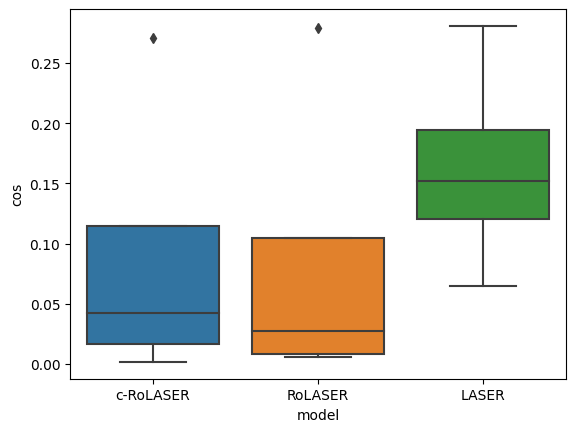

In [36]:
sns.boxplot(data=all_scores, x='model', y='cos')


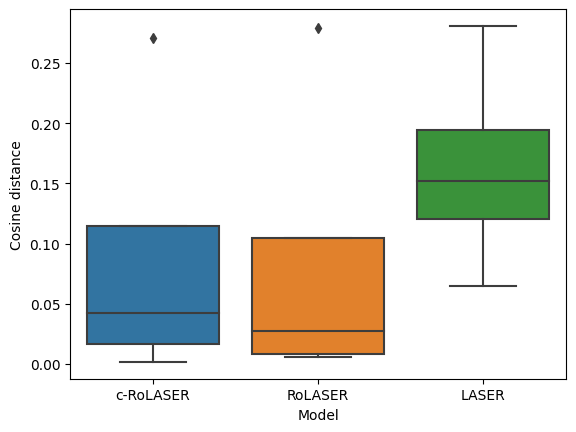

In [42]:
sns.boxplot(data=all_scores, x='model', y='cos', palette='tab10')
plt.ylabel('Cosine distance')
plt.xlabel('Model')
plt.savefig(os.path.join(output_dir, 'cosine_distance.png'))

In [29]:
score_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.startswith('outputs_') and f.endswith('.json')]

score_files

['/home/lnishimw/scratch/RoLASER/outputs/outputs_c-rolaser.json',
 '/home/lnishimw/scratch/RoLASER/outputs/outputs_rolaser.json',
 '/home/lnishimw/scratch/RoLASER/outputs/outputs_laser2.json']

In [32]:
MODELS = {
    'laser2': 'LASER',
    'rolaser': 'RoLASER',
    'c-rolaser': 'c-RoLASER'
}

output_dir = "/home/lnishimw/scratch/RoLASER/outputs/demo"

score_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.startswith('outputs_') and f.endswith('.json')]

score_dataframes = []
for score_file in score_files:
    model = MODELS[score_file.split('_')[1].split('.')[0]]
    scores = pd.DataFrame.from_dict(json.load(open(score_file)), orient='index')
    scores['model'] = model
    score_dataframes.append(scores)


all_scores = pd.concat(score_dataframes)

In [33]:
all_scores[['model', 'cos']].groupby('model').describe().to_csv('scores_summary.csv')

In [34]:
all_scores[['model', 'cos']]

,model,cos
0,c-RoLASER,0.062393
1,c-RoLASER,0.271052
2,c-RoLASER,0.001693
3,c-RoLASER,0.021538
0,RoLASER,0.046205
1,RoLASER,0.279317
2,RoLASER,0.009111
3,RoLASER,0.005997
0,LASER,0.064376
1,LASER,0.280824
